In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
plt.style.use('science')

Using the derivation as shown in Miyamoto et al (2022), the distance from the WR star to the stagnation point can be calculated by:

$$\boxed{r_{wr} = \frac{1}{1+\phi}d}$$

using the fact that $R_{wr}/d \ll R_o/d \ll 1$, where $d$ is the distance between the stars and $R$ is the radius of a star. 

$\phi$ is given by the ratio of momentum rates of the two stellar winds:

$$\boxed{\phi = \sqrt{\frac{\dot{M_{o}}v_{o_{\infty}}}{\dot{M_{wr}}v_{wr_{\infty}}}}}$$

Following from this, the distance from the O star to the stagnation point can simply be calculated by $d - r_{wr}$



In [39]:
def chi(v, d, Mdot):
    v_8 = v/1000
    d = d/1e12
    Mdot = Mdot/1e-7
    return (v_8**4 * d / Mdot)

def velocity(d, v_inf, R):
    return v_inf * (1 - R/d)

In [46]:
D = 2.042e13 #cm
vO = 3100 #km/s
vWR = 2860 #km/s
MdotO = 3.7e-7 
MdotWR = 1.7e-5 
R_O = 1.74e12 #cm
R_WR = 1.39e11  #cm


In [47]:
# D = 2.042e13 #cm
# vO = 3100 #km/s
# vWR = 2860 #km/s
# MdotO = 3.7e-7 
# MdotWR = 2.2e-5 
# R_O = 1.74e12 #cm
# R_WR = 1.39e11  #cm

In [48]:
phi = np.sqrt(MdotO*vO/(MdotWR*vWR))
phi

0.15359399326661624

In [49]:
D_array = np.linspace(D, 5*D, 1000)
r_WR_array = np.empty(len(D_array))

for i in range(len(D_array)):
    r_WR = 1/(1+phi) * D_array[i]
    r_WR_array[i] = r_WR

r_O_array = D_array - r_WR_array

In [50]:
vels_O = velocity(r_O_array, vO, R_O)
chis_O = chi(vels_O, r_O_array, MdotO)

vels_WR = velocity(r_WR_array, vWR, R_WR)
chis_WR = chi(vels_WR, r_WR_array, MdotWR)

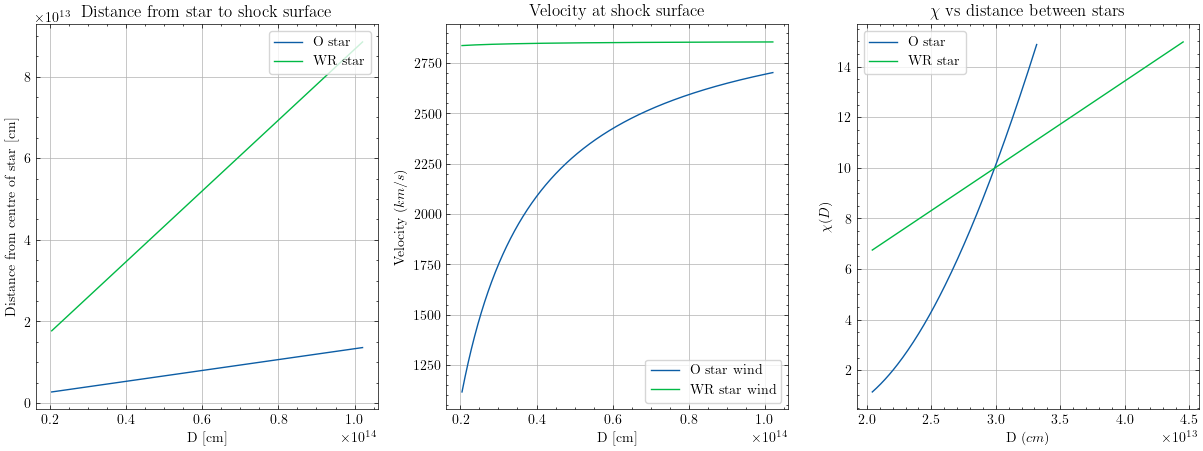

In [51]:
x = np.linspace(0, 10*D, 1000)

fig, ax = plt.subplots(ncols = 3, figsize=(15,5))
ax[0].plot(D_array, r_O_array, label="O star")
ax[0].plot(D_array, r_WR_array, label="WR star")
ax[0].set_xlabel("D [cm]")
ax[0].set_title("Distance from star to shock surface")
ax[0].set_ylabel("Distance from centre of star [cm]")
ax[0].legend(frameon=True, loc='upper right')
ax[0].grid()

ax[1].plot(D_array, vels_O, label="O star wind")
ax[1].plot(D_array, vels_WR, label="WR star wind")
ax[1].set_xlabel("D [cm]")
ax[1].set_title("Velocity at shock surface")
ax[1].set_ylabel("Velocity $(km/s)$")
ax[1].grid()
ax[1].legend(frameon=True)

ax[2].plot(D_array[np.where(chis_O<15)], chis_O[np.where(chis_O<15)], label="O star")
ax[2].plot(D_array[np.where(chis_WR<15)], chis_WR[np.where(chis_WR<15)], label="WR star")
ax[2].set_title("$\chi$ vs distance between stars")
ax[2].set_xlabel("D $(cm)$")
ax[2].set_ylabel("$\chi(D)$")
ax[2].grid()
ax[2].legend(frameon=True)

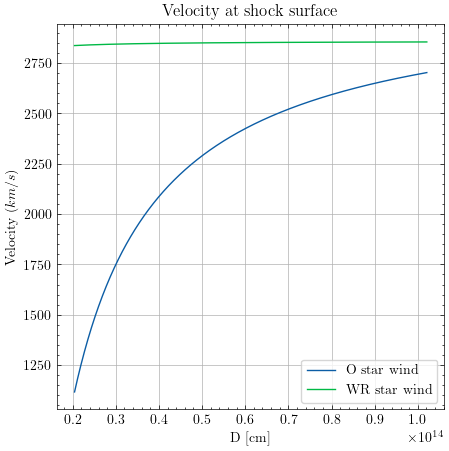

In [8]:
fig, ax = plt.subplots(figsize=(5,5))


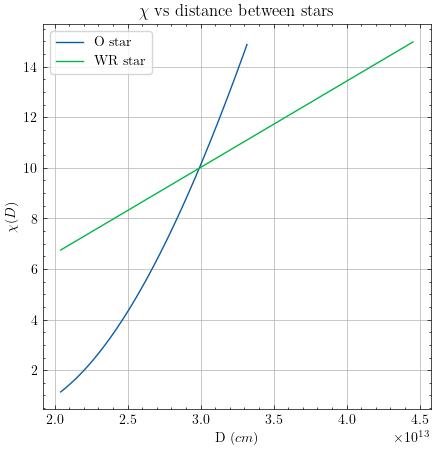

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
